## INTRODUCTION


Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. For example, if you start your quarter with 400 customers and end with 380, your churn rate is 5% because you lost 5% of your customers.

Obviously, your company should aim for a churn rate that is as close to 0% as possible. In order to do this, your company has to be on top of its churn rate at all times and treat it as a top priority.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setting up the connection with the google drive so that we can import our CustomerChurn data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have imported all the required libraries. Pandas and numpy for handling the dataset, doing preprocessing and also creating the dataframe. while, matplotlib and seaborn are imported for the purpose of data visualization.

## DATA UNDERSTANDING AND PREPROCESSING

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CutomerChurnData.csv")
df

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C01119,R1,50,43,N,6,27,E3,4,N,...,N,Y,Y,Y,Y,N,2.708,3.296,C3,N
996,C01120,R1,34,52,Y,2,106,E2,19,N,...,Y,Y,N,Y,Y,N,1.599,4.663,C3,N
997,C01121,R1,15,46,Y,17,63,E5,1,N,...,Y,Y,N,Y,Y,Y,1.308,4.143,C4,Y
998,C01122,R1,7,34,N,2,22,E5,5,N,...,N,N,N,N,N,N,1.537,3.091,C1,N


The customer churn data has been imported to the notebook and it basically contains 1000 rows and 39 columns

In [ ]:
df.describe()

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.242000,41.552000,11.576000,71.906000,10.79000,2.316000,11.163600,13.34350,13.572200,13.911500,10.88070,536.994100,535.407900,440.293200,616.090000,423.188500,2.149468,3.926546
std,21.295937,12.679435,10.132467,80.297826,10.14499,1.434644,9.540451,17.41479,18.850834,14.404653,19.24529,729.764065,867.466796,848.250381,874.929462,961.485455,0.716255,0.778627
min,1.000000,18.000000,0.000000,9.000000,0.00000,1.000000,1.050000,0.00000,0.000000,0.000000,0.00000,1.050000,0.000000,0.000000,0.000000,0.000000,0.049000,2.197000
25%,16.000000,32.000000,3.750000,28.000000,3.00000,1.000000,5.150000,0.00000,0.000000,0.000000,0.00000,86.037500,0.000000,0.000000,0.000000,0.000000,1.639000,3.332000
50%,34.500000,40.000000,9.000000,46.000000,8.00000,2.000000,8.500000,0.00000,0.000000,12.125000,0.00000,288.225000,0.000000,0.000000,362.500000,0.000000,2.140000,3.829000
75%,53.000000,51.000000,18.000000,83.250000,17.25000,3.000000,13.862500,24.25000,30.787500,19.562500,23.58750,700.387500,836.912500,466.512500,871.250000,140.075000,2.629000,4.422000
max,72.000000,77.000000,55.000000,732.000000,47.00000,7.000000,99.950000,173.00000,77.700000,109.250000,109.70000,7257.600000,4905.850000,4758.050000,7515.000000,6444.950000,4.605000,6.596000


This particular command describes the attributes mean, standard deviation, minimum, maximum and 25%, 50%, 75% value for all the numerical dataype columns. Thus, it does not include any object or categorical variable in it.

In [ ]:
df.dtypes

cust_id      object
region       object
tenure        int64
age           int64
marital      object
address       int64
income        int64
ed           object
employ        int64
retire       object
gender       object
reside        int64
tollfree     object
equip        object
callcard     object
wireless     object
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
equipten    float64
cardten       int64
wireten     float64
multline     object
voice        object
pager        object
internet     object
callid       object
callwait     object
forward      object
confer       object
ebill        object
loglong     float64
lninc       float64
custcat      object
churn        object
dtype: object

The above command describes the datatypes of each and every column within the dataset, so that if required we can convert the datatype of the required columns.

In [ ]:
vari=['cust_id','region','marital','ed','retire','gender','tollfree','equip','callcard','wireless','multline','voice','pager'
     ,'internet','callid','callwait','forward','confer','ebill','custcat','churn']
for a in vari:
    df[a] = df[a].astype('category')

Here, we are running a 'for' loop to convert all the variable with 'object' datatype to 'category' datatype.

In [ ]:
df['region']=df['region'].astype('category')
df['marital']=df['marital'].astype('category')
df['ed']=df['ed'].astype('category')
df['retire']=df['retire'].astype('category')
df['gender']=df['gender'].astype('category')

In [ ]:
df.dtypes

cust_id     category
region      category
tenure         int64
age            int64
marital     category
address        int64
income         int64
ed          category
employ         int64
retire      category
gender      category
reside         int64
tollfree    category
equip       category
callcard    category
wireless    category
longmon      float64
tollmon      float64
equipmon     float64
cardmon      float64
wiremon      float64
longten      float64
tollten      float64
equipten     float64
cardten        int64
wireten      float64
multline    category
voice       category
pager       category
internet    category
callid      category
callwait    category
forward     category
confer      category
ebill       category
loglong      float64
lninc        float64
custcat     category
churn       category
dtype: object

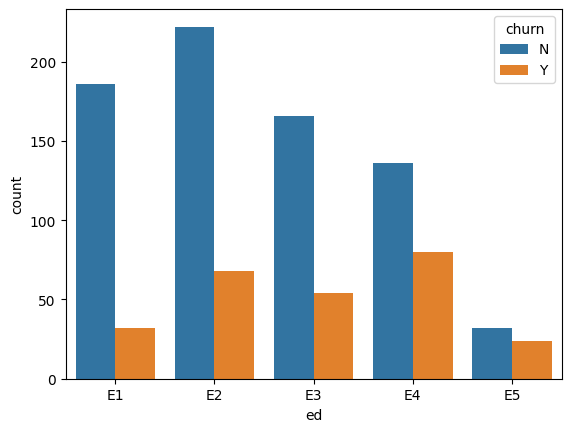

In [ ]:
sns.countplot(x=df['ed'],hue=df['churn'])
plt.show()

Mostly, all the columns within the dataset are converted to numerical value, so that they can be provided as an input to the Decision Tree model at the model building phase.

In [ ]:
df.isnull().sum()

cust_id     0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
equipten    0
cardten     0
wireten     0
multline    0
voice       0
pager       0
internet    0
callid      0
callwait    0
forward     0
confer      0
ebill       0
loglong     0
lninc       0
custcat     0
churn       0
dtype: int64

We can observe that the attributes does not contain any null values or missing values.

In [ ]:
df=df.drop(['marital','ed','retire'], axis=1)

I am manually dropping some columns here, the reason are as: 'martial', 'ed' which is education, 'retire'  status cannot help becasue the dataset is about an internet company, and the marital status does not have any relation. Thus, if a customer requires telecommunication related service he will purchase it irrespective of his gender, education or retirement status.

In [ ]:
df.head()

,cust_id,region,tenure,age,address,income,employ,gender,reside,tollfree,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,9,64,5,N,2,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,24,116,29,Y,2,Y,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,9,30,2,N,4,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,2,19,4,Y,5,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,7,166,31,N,5,Y,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N


## DATA VISUALIZATION

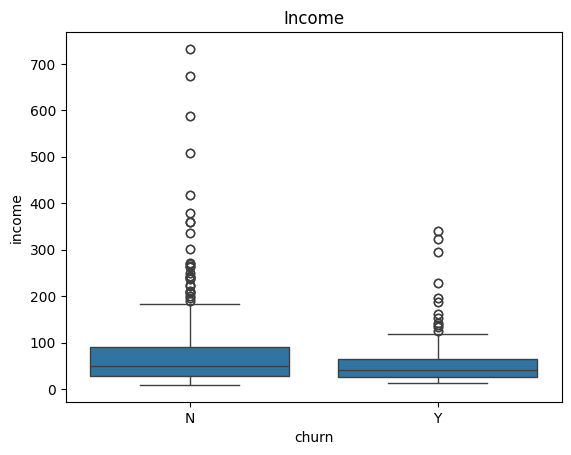

In [ ]:
sns.boxplot(x=df['churn'],y=df['income'])
plt.title('Income')
plt.show()

The box plot for INCOME represent the distribution of employee income which include some incomes as outliers

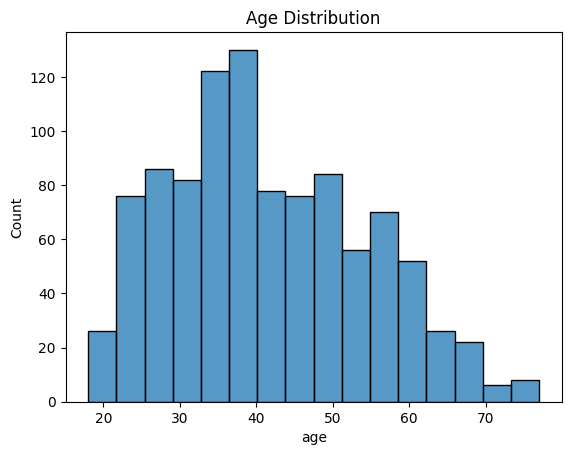

In [ ]:
sns.histplot(x=df['age'])
plt.title('Age Distribution')
plt.show()

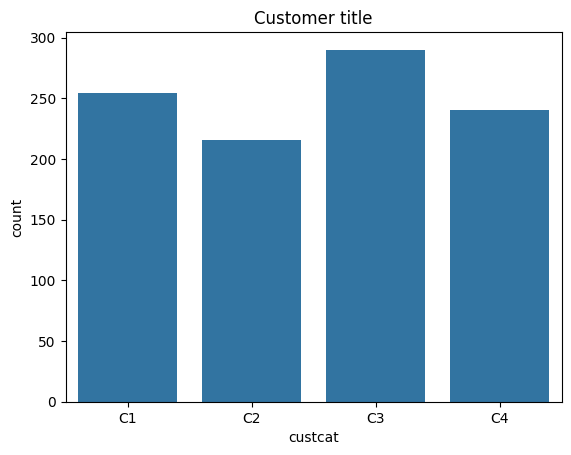

In [ ]:
sns.countplot(x=df['custcat'])
plt.title('Customer title')
plt.show()

The countplot shows the count of customer within each category

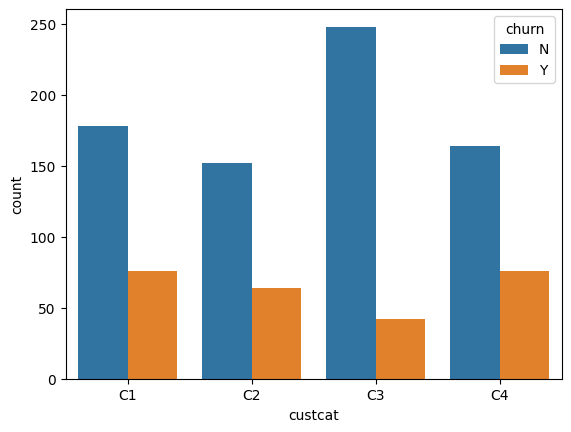

In [ ]:
sns.countplot(x=df['custcat'],hue=df['churn'])
plt.show()

In [ ]:
abc=df.select_dtypes(include=['category'])
abc=abc.drop(['churn', 'cust_id'],axis=1)
abc.columns

Index(['region', 'gender', 'tollfree', 'equip', 'callcard', 'wireless',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'custcat'],
      dtype='object')

We are copying the original dataframe to a new variable so that we can create dummies for the categorical variable.

In [ ]:
df1=pd.get_dummies(abc, columns=abc.columns)
df1

,region_R1,region_R2,region_R3,gender_N,gender_Y,tollfree_N,tollfree_Y,equip_N,equip_Y,callcard_N,...,forward_N,forward_Y,confer_N,confer_Y,ebill_N,ebill_Y,custcat_C1,custcat_C2,custcat_C3,custcat_C4
0,0,1,0,1,0,1,0,1,0,0,...,0,1,1,0,1,0,1,0,0,0
1,0,0,1,0,1,0,1,1,0,0,...,1,0,0,1,1,0,0,0,1,0
2,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,0,0,1,0
3,0,0,1,0,1,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
4,0,0,1,1,0,0,1,1,0,0,...,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,1,1,0,0,...,0,1,0,1,1,0,0,0,1,0
996,1,0,0,1,0,0,1,1,0,0,...,0,1,0,1,1,0,0,0,1,0
997,1,0,0,1,0,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
998,1,0,0,0,1,1,0,0,1,1,...,1,0,1,0,1,0,1,0,0,0


Here, dummy variables are created for categorical variable

In [ ]:
df1.isnull().sum()

region_R1     0
region_R2     0
region_R3     0
gender_N      0
gender_Y      0
tollfree_N    0
tollfree_Y    0
equip_N       0
equip_Y       0
callcard_N    0
callcard_Y    0
wireless_N    0
wireless_Y    0
multline_N    0
multline_Y    0
voice_N       0
voice_Y       0
pager_N       0
pager_Y       0
internet_N    0
internet_Y    0
callid_N      0
callid_Y      0
callwait_N    0
callwait_Y    0
forward_N     0
forward_Y     0
confer_N      0
confer_Y      0
ebill_N       0
ebill_Y       0
custcat_C1    0
custcat_C2    0
custcat_C3    0
custcat_C4    0
dtype: int64

Thus, the model does not contain any null values.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

df2=df.drop(['cust_id','churn'],axis=1)
yyy=df['churn']
rf = RandomForestClassifier(n_estimators=10)
rf.fit(df1, yyy)

feature_importances = rf.feature_names_in_
feature_importances

array(['region_R1', 'region_R2', 'region_R3', 'gender_N', 'gender_Y',
       'tollfree_N', 'tollfree_Y', 'equip_N', 'equip_Y', 'callcard_N',
       'callcard_Y', 'wireless_N', 'wireless_Y', 'multline_N',
       'multline_Y', 'voice_N', 'voice_Y', 'pager_N', 'pager_Y',
       'internet_N', 'internet_Y', 'callid_N', 'callid_Y', 'callwait_N',
       'callwait_Y', 'forward_N', 'forward_Y', 'confer_N', 'confer_Y',
       'ebill_N', 'ebill_Y', 'custcat_C1', 'custcat_C2', 'custcat_C3',
       'custcat_C4'], dtype=object)

Here, we are creating RandomForestClassifier to determine the attributes that are more relevant in increasing the model performance. The model thus provides the list of attributes as mentioned in the above code.

In [ ]:
df['churn'].value_counts()

N    742
Y    258
Name: churn, dtype: int64

We have executed this command to check whether the data is imbalanced or not. It is found that the data is imbalanced as it contains a lot more "N" values when compare to "Y"

## MODEL DEVELOPMENT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

Lets get started with building the DecisionTree model by importing the sklearn library.

In [ ]:
x=df1
y=df['churn']

We are dropping the column 'churn' and 'cust_id' for the independent variable 'x'. While, the column 'churn' is being considered as the dependent vairable 'y'

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

Splitting the data into training and testing data. The training data will be used to train the model, while the testing data will be used to check the accuracy of the model.

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 35) (300, 35) (700,) (300,)


In [ ]:
train_df=pd.concat([X_train,y_train], axis=1)
majDF=train_df[train_df['churn']=='N']
minDF=train_df[train_df['churn']=='Y']

sample_min=minDF.sample(n=len(majDF), random_state=4, replace=True)
sampled_data=pd.concat([majDF,sample_min])

balancedf=sampled_data.sample(frac=1,random_state=4)
X_train=balancedf.drop(['churn'],axis=1)
y_train=balancedf['churn']

We have balanced the dataset by creating samples so that the models gets enough data while creating the decision tree.

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

For the decision tree, have considered the maximum depth as 4 which is an optimal number, as we can't increase the depth further more as it can oversample the data.

[Text(0.5431034482758621, 0.9, 'internet_Y <= 0.5\nentropy = 1.0\nsamples = 1058\nvalue = [529, 529]\nclass = N'),
 Text(0.27586206896551724, 0.7, 'equip_Y <= 0.5\nentropy = 0.919\nsamples = 595\nvalue = [396, 199]\nclass = N'),
 Text(0.13793103448275862, 0.5, 'custcat_C2 <= 0.5\nentropy = 0.843\nsamples = 468\nvalue = [341, 127]\nclass = N'),
 Text(0.06896551724137931, 0.3, 'custcat_C1 <= 0.5\nentropy = 0.883\nsamples = 408\nvalue = [285, 123]\nclass = N'),
 Text(0.034482758620689655, 0.1, 'entropy = 0.808\nsamples = 242\nvalue = [182, 60]\nclass = N'),
 Text(0.10344827586206896, 0.1, 'entropy = 0.958\nsamples = 166\nvalue = [103, 63]\nclass = N'),
 Text(0.20689655172413793, 0.3, 'callwait_N <= 0.5\nentropy = 0.353\nsamples = 60\nvalue = [56, 4]\nclass = N'),
 Text(0.1724137931034483, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Y'),
 Text(0.2413793103448276, 0.1, 'entropy = 0.0\nsamples = 55\nvalue = [55, 0]\nclass = N'),
 Text(0.41379310344827586, 0.5, 'callcard_N <= 

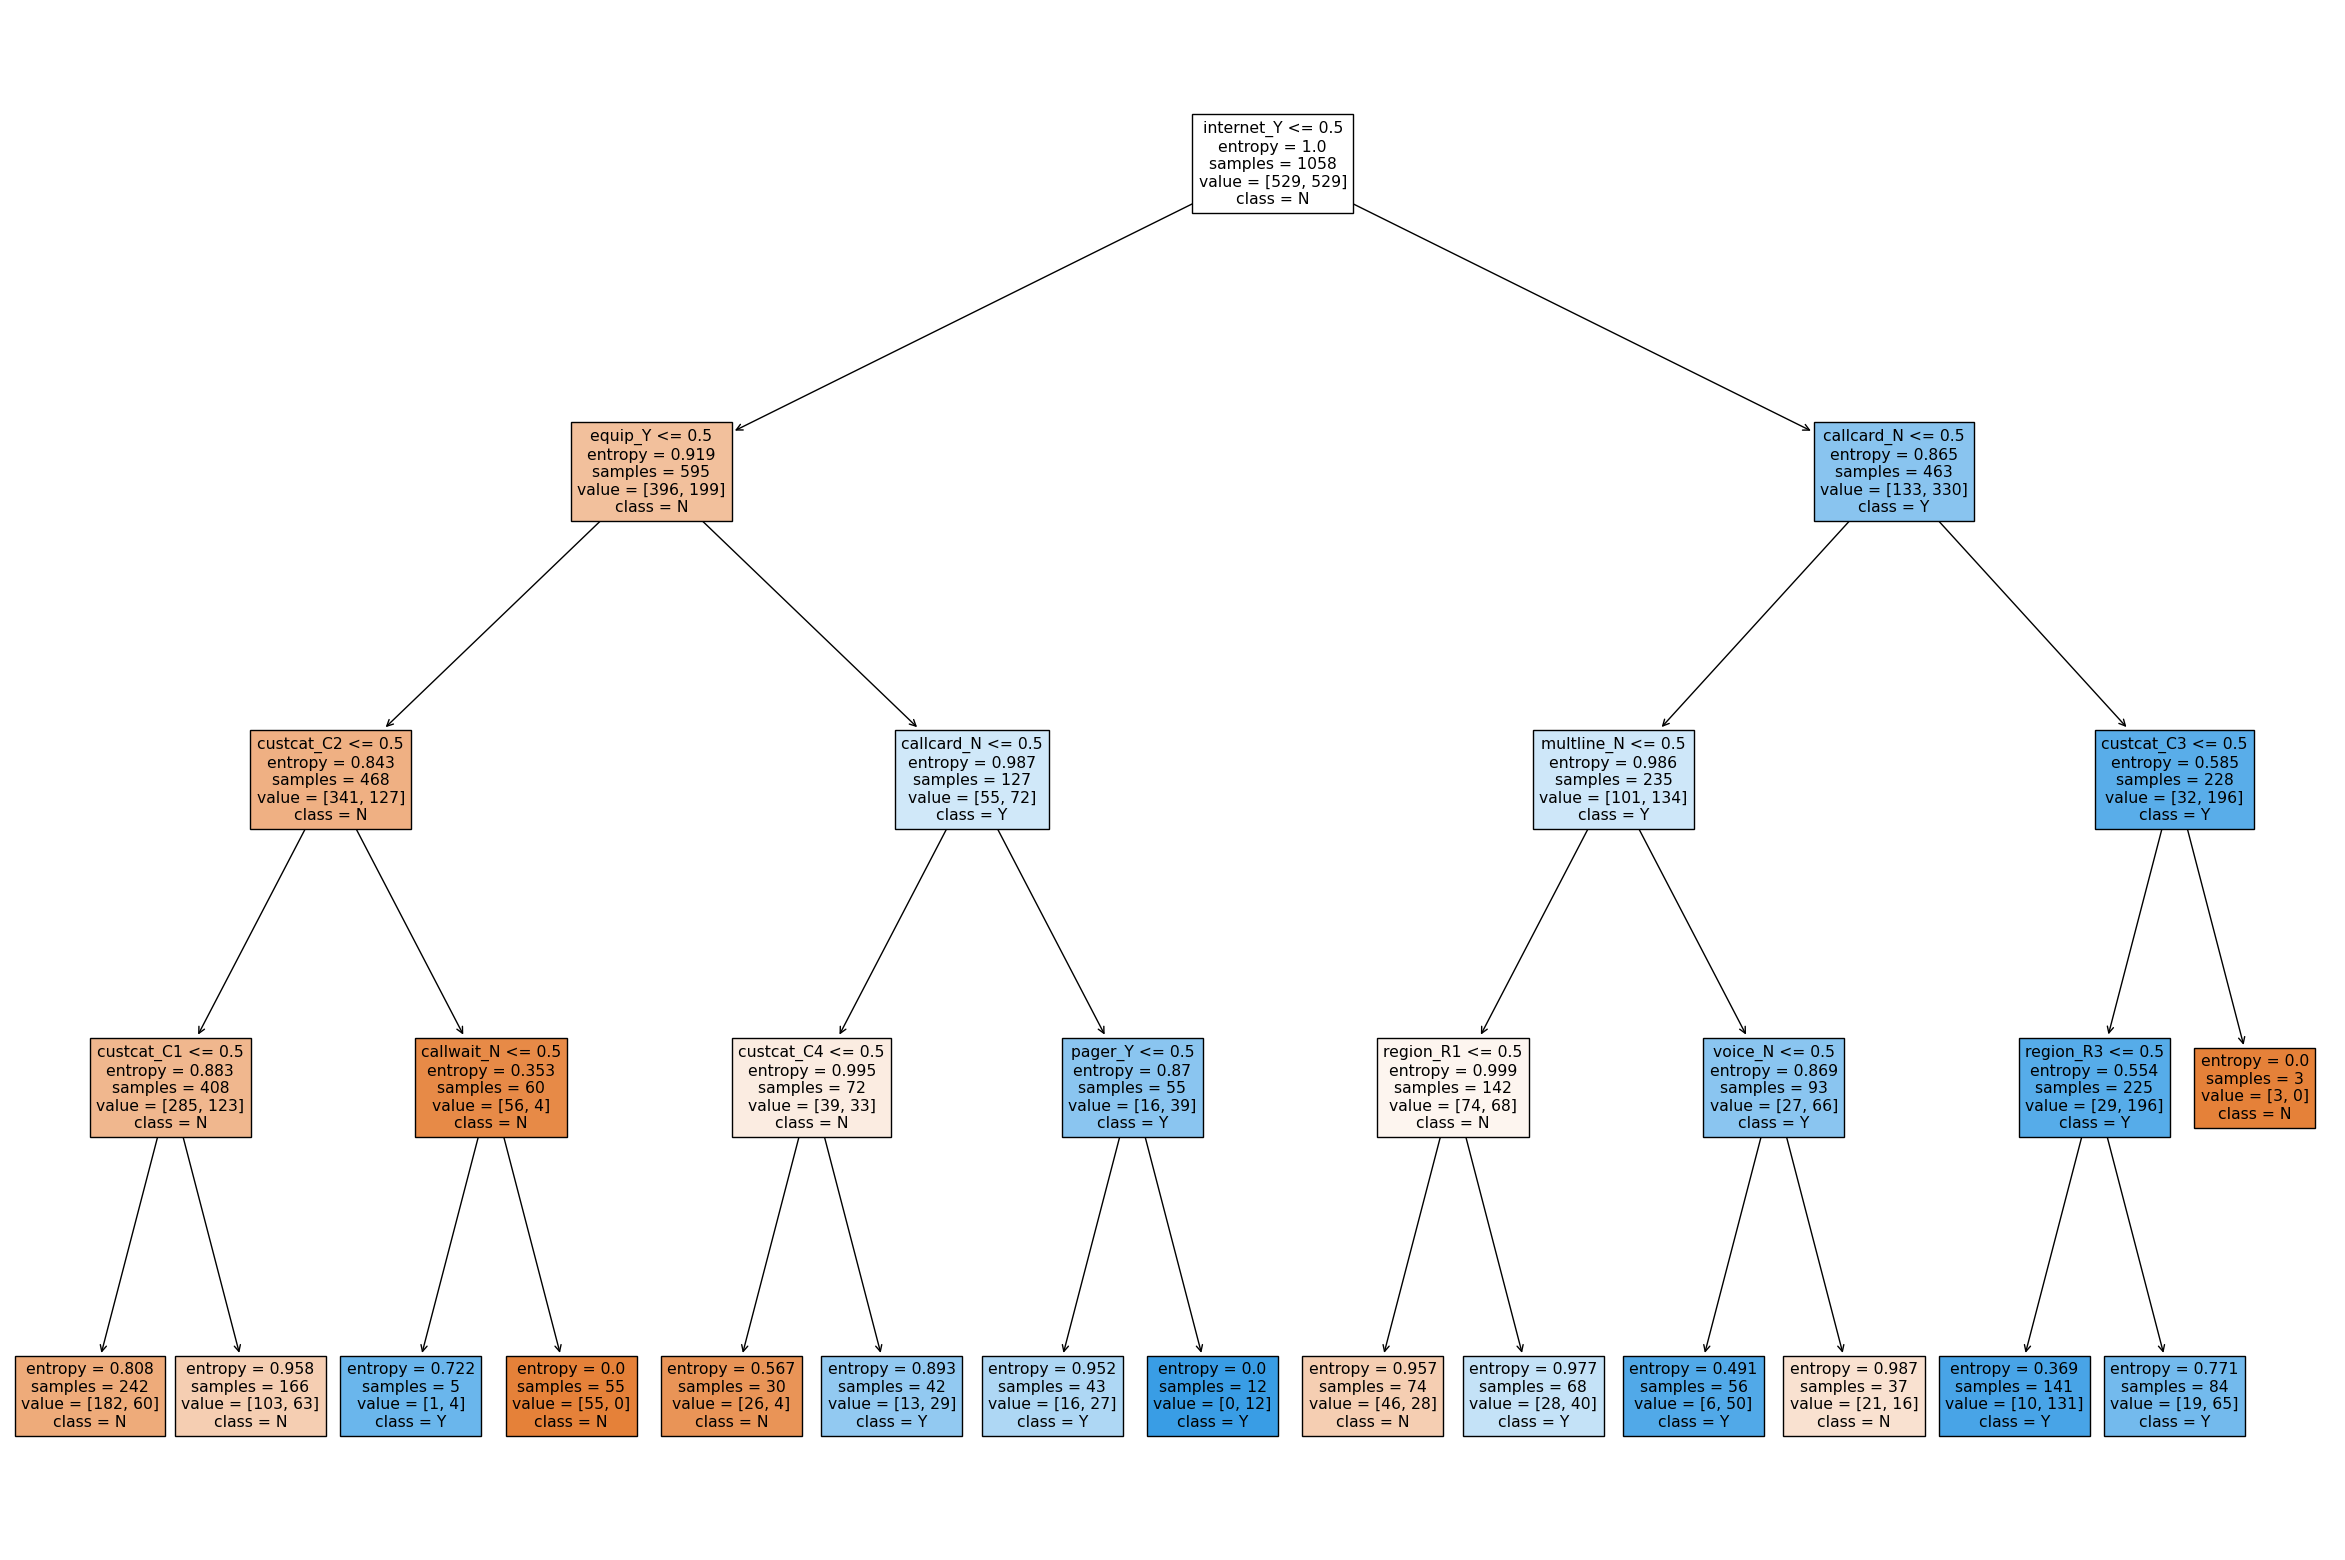

In [ ]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(clf,
               feature_names=list(X_train.columns),
               class_names=['N','Y'],
               filled=True)

In decision tree, the leaf node with the lowest entropy value is thus considered.

## RESULT AND MODEL EVALUATION

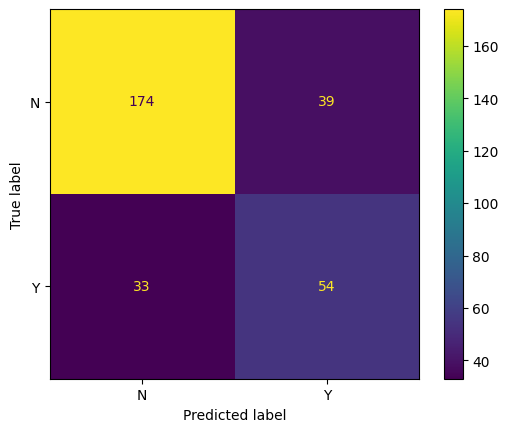

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
predTest=clf.predict(X_test)
confusion_mat=confusion_matrix(y_test,predTest)
ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_).plot()

In [ ]:
predictions_testDT=clf.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_testDT))

              precision    recall  f1-score   support

           N       0.84      0.82      0.83       213
           Y       0.58      0.62      0.60        87

    accuracy                           0.76       300
   macro avg       0.71      0.72      0.71       300
weighted avg       0.77      0.76      0.76       300



Basically, in machine learning, we basically use evaluation matrix such as precision, recall and accuracy in determining the performance of our model. The better the precision, recall and accuracy score, the better is the performance of our model.
The Precision of 0.80 for 'N' churn shows that the model is 80% time correct in predicting the N churn, which is the same case for 'Y' churn which has Precision score of 0.57.
The accuracy score of the overall model is 0.75 i.e. 75% which is somewhat good but here the model can be made more accurate in prediction by providing more data during its training phase.

And, I do feel that the columns 'cust_cat' and 'callwait' has the greatest impact in the DecisionTree as it can also be seen through their entropy value

## CONCLUSIONS

In this project, we have basically included the customer churn data, customer churn basically helps the company in retaining their customer. This data basically contained variable with 'object' datatype, so these variable were converted to categorical datatype, so that we can create dummy variable which was thus provided to the model. Thus, by using RandomForestClassifier we determined the relevant columns and then provided it to the DecisionTreeClassifier at the model building phase. Thus, by training the model, we build a machine learning model which was then evaluated using model evaluatiojn parameter such as precision, recall and accuracy score. Thus, we can conclude that the model had better prediction related to 'N' value churn data when compared to 'Y' value data.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/MLassignment.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MLassignment.ipynb to html
[NbConvertApp] Writing 739546 bytes to /content/drive/MyDrive/Colab Notebooks/MLassignment.html
